In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Loading the dataset

In [17]:
df = pd.read_csv('/Users/mrnalikamohanraja/Desktop/MSDS NTU/Semester 2/4. SD6125 Data Mining/Technical Review/6125_group/archive/Complex8.csv')

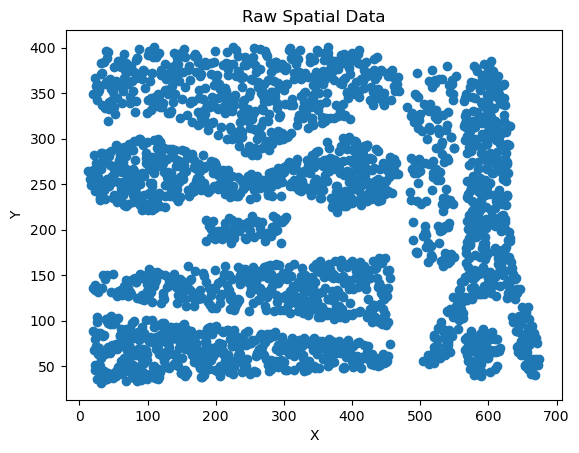

In [18]:
import matplotlib.pyplot as plt

plt.scatter(df.iloc[:, 0], df.iloc[:, 1])
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Raw Spatial Data')
plt.show()

In [ ]:
df.isnull().sum()

564.887    0
58.119     0
0          0
dtype: int64

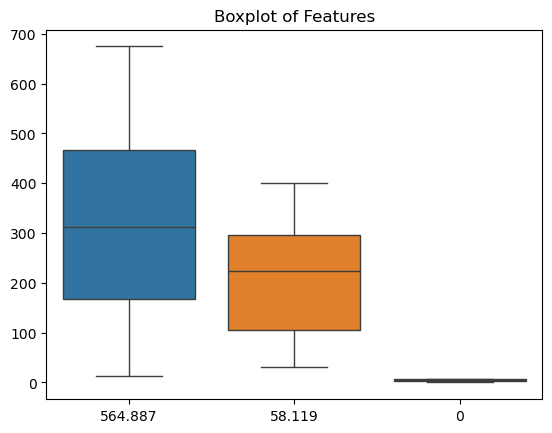

In [20]:
sns.boxplot(data=df)
plt.title("Boxplot of Features")
plt.show()

In [21]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# K-Means Clustering

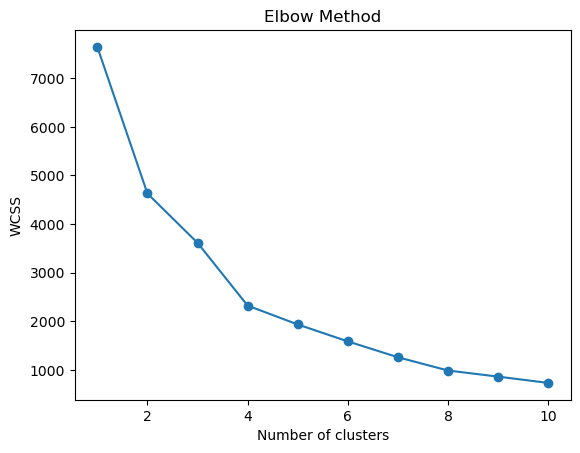

In [ ]:
# Elbow Method plot to identify the ideal number of clusters
inertia = []

k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k,random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow method graph
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [23]:
# Implementing K-Means Clustering
kmeans = KMeans(n_clusters=4, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)
kmeans_silhouette = silhouette_score(X_scaled, y_kmeans)
print("K-Means Silhouette Score:", kmeans_silhouette)

K-Means Silhouette Score: 0.45782151620950523


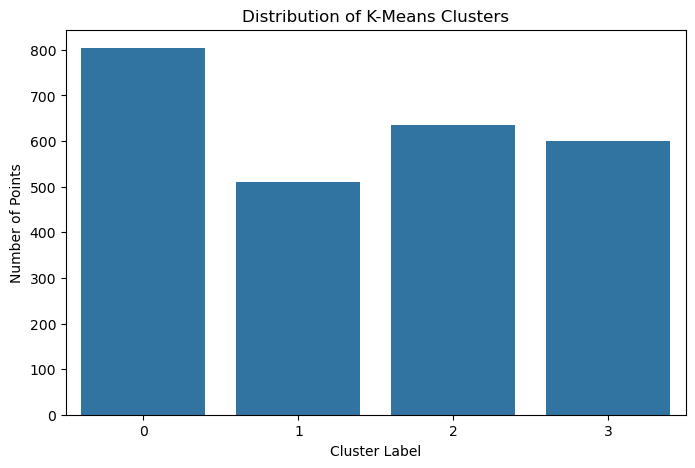

In [24]:
df_clusters = pd.DataFrame({'Cluster': y_kmeans})

plt.figure(figsize=(8, 5))
sns.countplot(x='Cluster', data=df_clusters)
plt.title('Distribution of K-Means Clusters')
plt.xlabel('Cluster Label')
plt.ylabel('Number of Points')
plt.show()

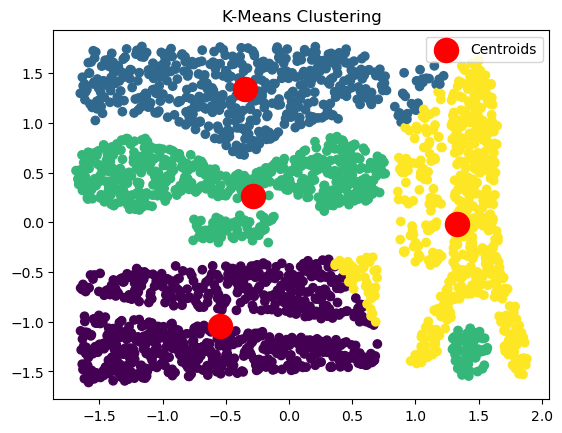

In [25]:
# Visualising clusters in K-Means
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_kmeans)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            s=300, c='red', label='Centroids')
plt.title('K-Means Clustering')
plt.legend()
plt.show()

# Agglomerative Clustering

In [26]:
# Implementing Agglomerative Clustering
agg = AgglomerativeClustering(n_clusters=4, linkage='ward')
y_agg = agg.fit_predict(X_scaled)
agg_silhouette = silhouette_score(X_scaled, y_agg)
print("Hierarchical Clustering Silhouette Score:", agg_silhouette)

Hierarchical Clustering Silhouette Score: 0.45978809523140535


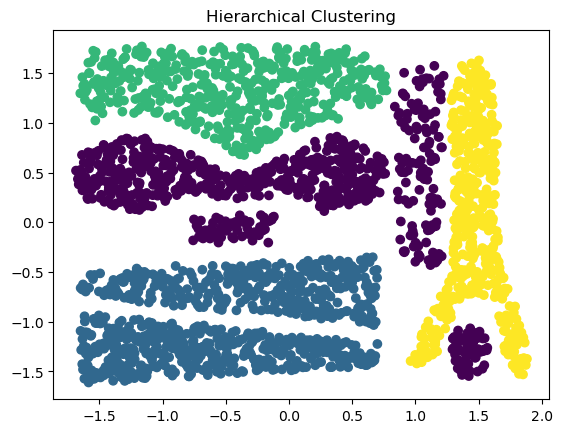

In [27]:
# Visualising clusters in Agglomerative Clustering
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_agg)
plt.title('Hierarchical Clustering')
plt.show()

<module 'matplotlib.pyplot' from '/opt/anaconda3/lib/python3.12/site-packages/matplotlib/pyplot.py'>

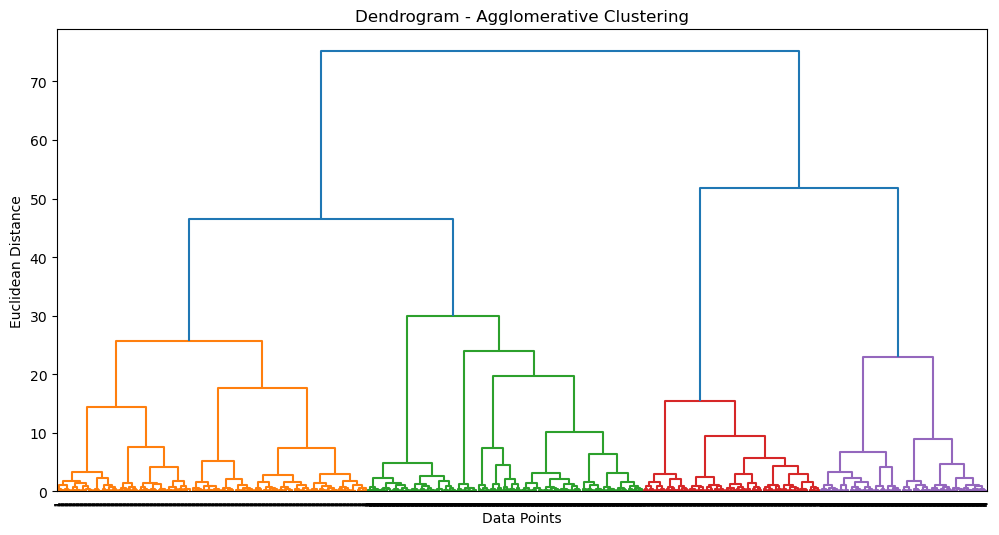

In [28]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import fcluster

linkage_matrix = sch.linkage(X_scaled, method='ward')
num_clusters = 4
cluster_labels = fcluster(linkage_matrix, num_clusters, criterion='maxclust')

plt.figure(figsize=(12, 6))
dendro = sch.dendrogram(
    linkage_matrix,
    labels=cluster_labels,
    color_threshold=linkage_matrix[-(num_clusters - 1), 2],  
)

plt.title('Dendrogram - Agglomerative Clustering')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt


# DBSCAN Clustering

In [29]:
# Identifying best values for epsilon and min_samples
best_score = -1
best_eps = None
best_min_samples = None

for eps in np.arange(0.1, 2.0, 0.1):  
    for min_samples in range(3, 10): 
        db = DBSCAN(eps=eps, min_samples=min_samples)
        labels = db.fit_predict(X_scaled)
        
        if len(set(labels)) > 1:
            score = silhouette_score(X_scaled, labels)
            if score > best_score:
                best_score = score
                best_eps = eps
                best_min_samples = min_samples

print("Best DBSCAN Parameters: eps = {}, min_samples = {}, silhouette score = {}".format(best_eps, best_min_samples, best_score))


Best DBSCAN Parameters: eps = 0.6, min_samples = 3, silhouette score = 0.4897579026962026


In [30]:
# Implementing DBSCAN with derived parameters
dbscan = DBSCAN(eps=0.6, min_samples=3)
y_db = dbscan.fit_predict(X_scaled)
dbscan_silhouette = silhouette_score(X_scaled, y_db)
print("DBSCAN Silhouette Score:", dbscan_silhouette)

DBSCAN Silhouette Score: 0.4897579026962026


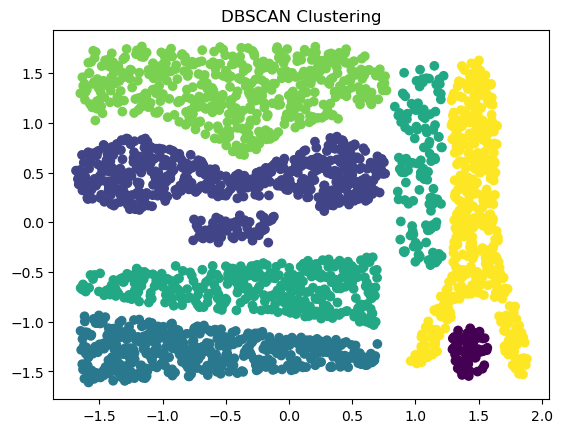

In [31]:
# Visualising clusters in DBSCAN
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_db)
plt.title('DBSCAN Clustering')
plt.show()